# All the President's Moods

During his tenure as US President, Donald Trump maintained a steady presence on Twitter. Since the words of the politicians tend to affect the behavior of other people, including markets, there is a sizable literature quantifying the effect of politician speeches on market behavior in the aggregate. 

Unllke other politicians, Trump's tweets were both impassioned and plentiful. This means Twitter can give a large volume of reactions to work with that have a distribution of "sentiment."

In this assignment:
1. (2 points) Load a json file of all the president's tweets from August 30 to November 5th. After loading them, put the following information into a dataframe:
    - The full text of the Tweet. (string)
    - Any users mentioned in the Tweet. (string)
    - The timestamp. (datetime)
    - The date (YYYY-MM-DD) of the Tweet. (date)
    - Retweets (numeric)
    - Favorites (numeric)
    - Whether the Tweet was censored, meaning zero retweets (binary/boolean).
    
   __Hint: list comprehensions can be your best friend!__
   
2. (2 points) Create a "clean_text" column by doing the following to "full_text":
    - removing links, which are strings that start with "http"
    - removing hashtags, which are strings that start with "#"
    - removing mentions, which are strings that start with "@"
    - converting text to lower case.
    - removing punctuation.
    
   Now report:
    - The top 10 most common words (omitting stop words).
    - The top 5 Twitter accounts that are mentioned.
    - The top 5 most liked ("favorited") tweets.
    - The top 5 hashtags (hint: use a regular expression).
3. (4 points) Graph the daily volme of tweets over time, while annotating any major events.
4. (6 points) Run the tweets through sentiment analysis, and report:
    - The 20 most "negative" and "positive" words.
    - A graph of the sentiment over time.
    
5. (6 points) Trump and the Stock Market
    - Read in the time series dataset of S&P 500 closing, daily prices. Then merge this data to Trump's daily sentiment scores. __Graph both of them (EXTRA CREDIT GRAPH)__, calculate their correlation, and interpret what you see.

    - Since Trump often comments on the stock market but the stock market may also react to his tweets, it is not clear how the causal relationship should work. Describe in detail how you would answer the question: "Did President Trump's tweet sentiment influence the stock market?" Specifically describe:
        - The data you would need in addition to these data sources.
        - The way you would read in the data and manipulate it.
        - The sort of analysis or statistics you would calculate to answer the question.
    

In [2]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import matplotlib
import re
import string
from nltk.corpus import stopwords
import regex
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Number 1

In [55]:
tweets_df = pd.read_json('/Users/isaacwerries/Desktop/test/Trump_tweets.json') #open json file
pd.set_option('display.max_columns', None) #show all columns
tweets_df = tweets_df.drop_duplicates(subset = ['full_text'], keep = 'first')

In [56]:
tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,extended_entities,withheld_scope,withheld_copyright,withheld_in_countries
0,2020-11-05 15:37:40+00:00,1324375334653988864,1324375334653988864,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,27745,124472,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-05 15:09:19+00:00,1324368202139357186,1324368202139357184,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-05 14:12:37+00:00,1324353932022480896,1324353932022480896,STOP THE COUNT!,False,"[0, 15]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,120833,750449,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-05 00:01:07+00:00,1324139647111409667,1324139647111409664,"Detroit Absentee Ballot Counting Chaos, Blocke...",False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,71580,249948,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-05 00:00:05+00:00,1324139387546984449,1324139387546984448,Demands Arise for PA Attorney General to ‘Step...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,44496,172668,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,2020-08-30 10:37:39+00:00,1300019849540886528,1300019849540886528,GREAT PATRIOTS! https://t.co/BWGxVoBTmI,False,"[0, 15]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,True,28849,139909,False,False,0.0,en,1.299899e+18,1.299899e+18,"{'url': 'https://t.co/BWGxVoBTmI', 'expanded':...",{'created_at': 'Sun Aug 30 02:38:46 +0000 2020...,NaN,NaN,NaN,NaN
1785,2020-08-30 10:36:14+00:00,1300019490177069060,1300019490177069056,Disgraceful Anarchists. We are watching them c...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,True,20520,68859,False,False,0.0,en,1.299902e+18,1.299902e+18,"{'url': 'https://t.co/IvuIh6cRz5', 'expanded':...",NaN,NaN,NaN,NaN,NaN
1786,2020-08-30 10:31:53+00:00,1300018396130611200,1300018396130611200,Democrat “Leadership” has no clue. Request hel...,False,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,True,10607,33582,False,False,0.0,en,1.299935e+18,1.299935e+18,"{'url': 'https://t.co/Jifo9JwTD0', 'expanded':...",{'created_at': 'Sun

In [57]:
mod_df = tweets_df.loc[:,('full_text','entities','retweet_count','favorite_count')]
mod_df['censored'] = tweets_df['retweet_count'] == 0
mod_df['timestamp'] = tweets_df['created_at']
mod_df['date'] = tweets_df['created_at'].dt.strftime('%Y-%m-%d')

In [58]:
mod_df.head(5)

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date
0,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,"{'hashtags': [], 'symbols': [], 'user_mentions...",27745,124472,False,2020-11-05 15:37:40+00:00,2020-11-05
1,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,True,2020-11-05 15:09:19+00:00,2020-11-05
2,STOP THE COUNT!,"{'hashtags': [], 'symbols': [], 'user_mentions...",120833,750449,False,2020-11-05 14:12:37+00:00,2020-11-05
3,"Detroit Absentee Ballot Counting Chaos, Blocke...","{'hashtags': [], 'symbols': [], 'user_mentions...",71580,249948,False,2020-11-05 00:01:07+00:00,2020-11-05
4,Demands Arise for PA Attorney General to ‘Step...,"{'hashtags': [], 'symbols': [], 'user_mentions...",44496,172668,False,2020-11-05 00:00:05+00:00,2020-11-05


In [59]:
print(mod_df.dtypes)

full_text                      object
entities                       object
retweet_count                   int64
favorite_count                  int64
censored                         bool
timestamp         datetime64[ns, UTC]
date                           object
dtype: object


# Number 2

In [60]:
clean_text = mod_df['full_text'].str.lower() #convert to lowercase
clean_text = [re.sub(r'@\w+',"",x) for x in clean_text] #remove all @
clean_text = [re.sub(r'#\w+',"",x) for x in clean_text] #remove all hashtags
clean_text = [re.sub(r'http\S+',"",x) for x in clean_text] #remove all links
clean_text = [re.sub(r'[^\w\s]',"",x) for x in clean_text] #remove punctuation
mod_df['clean_text'] = clean_text

# Number 3

In [61]:
daily_vol = mod_df.groupby('date').count()
daily_vol

,full_text,entities,retweet_count,favorite_count,censored,timestamp,clean_text
date,,,,,,,
2020-08-30,23,23,23,23,23,23,23
2020-08-31,13,13,13,13,13,13,13
2020-09-01,19,19,19,19,19,19,19
2020-09-02,24,24,24,24,24,24,24
2020-09-03,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...
2020-11-01,51,51,51,51,51,51,51
2020-11-02,63,63,63,63,63,63,63
2020-11-03,36,36,36,36,36,36,36


Text(0, 0.5, '# of Tweets')

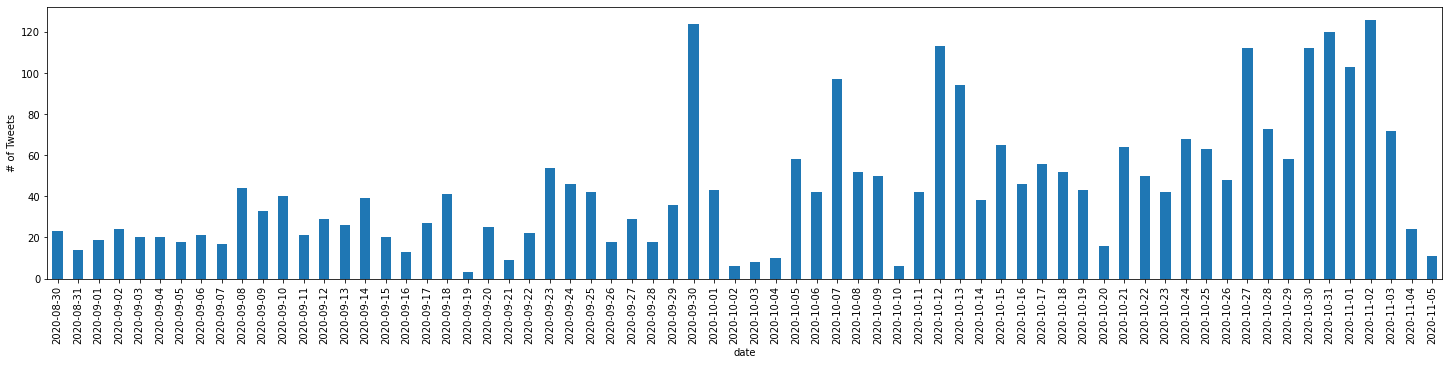

In [36]:
daily_vol['clean_text'].plot(x='date', figsize = (25,5), kind='bar')
plt.ylabel('# of Tweets')

In [39]:
red = mod_df['date'].count() >= 100
blue = mod_df['date'].count() < 100

In [49]:
col = []
for val in daily_vol['clean_text']:
    if val < 100:
        col.append('blue')
    else:
        col.append('red')

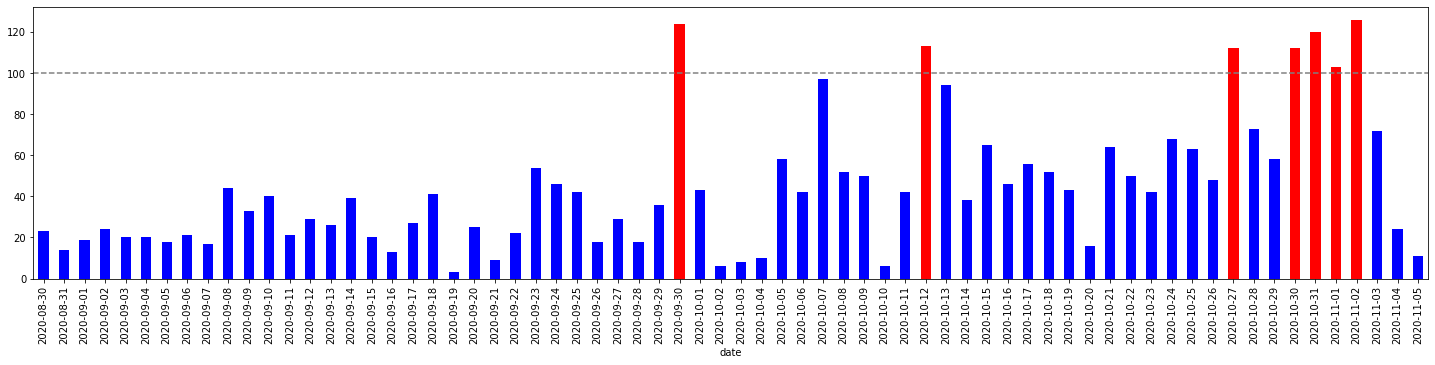

In [53]:
daily_vol['clean_text'].plot(x='date', figsize = (25,5), kind='bar', color=col)
plt.axhline(y=100, color='grey', linestyle = 'dashed' )